In [3]:
%pip install ultralytics
import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.0.215 🚀 Python-3.10.11 torch-2.1.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Setup complete ✅ (16 CPUs, 27.9 GB RAM, 395.8/474.7 GB disk)


In [4]:
import torch
torch.cuda.is_available()


True

In [6]:
%pip install IPython
from IPython import display
display.clear_output()

In [7]:
#load model
from ultralytics import YOLO
model=YOLO('yolov8n-seg.pt')



Predicting before training

In [13]:
model.predict(r'C:\Users\Toheed\Pictures\Evaluate dataset\84247_genmango_978406.jpg', conf=0.25, save=True)


image 1/1 C:\Users\Toheed\Pictures\Evaluate dataset\84247_genmango_978406.jpg: 448x640 4 apples, 3 oranges, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\segment\predict4


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 

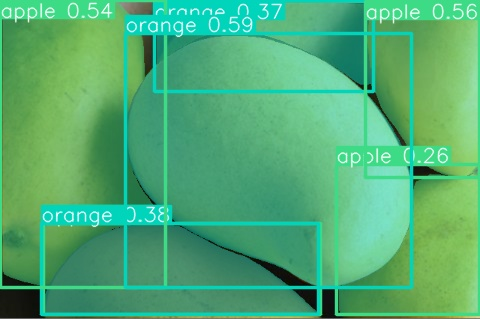

In [15]:
Image.open(r'C:\Users\Toheed\Downloads\runs\segment\predict4\84247_genmango_978406.jpg')

Training the model

In [20]:
# Train the model with custom dataset and finetuned parameters + validating the model
model=YOLO('yolov8n-seg.pt')
results = model.train(data='D:\Dataset\data.yaml', epochs=100, batch=16, imgsz=640, patience=5, optimizer='SGD', lr0=0.001)

Ultralytics YOLOv8.0.215 🚀 Python-3.10.11 torch-2.1.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=D:\Dataset\data.yaml, epochs=100, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train46, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torch

train: Scanning D:\Dataset\train\labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
val: Scanning D:\Dataset\valid\labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to runs\segment\train46\labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.937) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train46
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.16G     0.7551      2.455       2.81      1.168         89        640: 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         10        142     0.0433      0.915      0.226      0.164     0.0437      0.923      0.247      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.77G     0.7552      1.969      2.849       1.13        107        640: 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         10        142      0.043      0.908      0.234      0.169     0.0437      0.923      0.243      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.91G     0.8473      2.106      2.825      1.228         85        640: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         10        142      0.043      0.908       0.25      0.176      0.043      0.908      0.254      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.87G     0.7478      1.933      2.806      1.136        149        640: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         10        142      0.044       0.93      0.261      0.201     0.0433      0.915      0.276      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.49G     0.6962      1.555      2.778      1.091        173        640: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         10        142     0.0437      0.923      0.307      0.228     0.0433      0.915      0.322      0.205



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.64G     0.6566      1.581      2.752      1.084        129        640: 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         10        142     0.0437      0.923      0.328      0.255      0.043      0.908       0.34      0.228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.46G     0.5642      1.286      2.639      1.035         72        640: 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all         10        142     0.0437      0.923      0.333      0.265      0.043      0.908       0.34      0.245



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.65G     0.6474      1.439      2.652       1.06        203        640: 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all         10        142     0.0443      0.937      0.343      0.283     0.0437      0.923      0.348      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.53G      0.586      1.325      2.559      1.027        101        640: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         10        142     0.0443      0.937      0.377      0.308     0.0437      0.923      0.374      0.273



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.59G     0.5499      1.257      2.496      1.003        122        640: 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all         10        142     0.0443      0.937      0.379      0.324      0.044       0.93      0.385      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.44G     0.6106      1.299      2.555      1.026        149        640: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         10        142     0.0447      0.944      0.426      0.351     0.0443      0.937      0.426      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.49G     0.5376      1.205      2.358     0.9928        143        640: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]

                   all         10        142     0.0443      0.937      0.459      0.379     0.0443      0.937      0.462      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.47G     0.4919      1.096      2.291     0.9684         64        640: 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all         10        142      0.045      0.951      0.516       0.44     0.0447      0.944      0.515      0.392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.73G     0.5367      1.182      2.287     0.9639        140        640: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]

                   all         10        142      0.045      0.951      0.537       0.47     0.0447      0.944      0.536      0.415



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100       3.8G      0.548      1.123      2.226     0.9704         88        640: 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         10        142     0.0453      0.958      0.594      0.523     0.0447      0.944      0.588      0.456



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.75G     0.5074      1.021      2.167     0.9461        150        640: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         10        142     0.0453      0.958      0.606      0.543     0.0447      0.944       0.61      0.474



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.36G     0.5388       1.06      2.119     0.9673        181        640: 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         10        142     0.0453      0.958       0.64      0.576      0.045      0.951      0.641      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.84G     0.5121      1.001       2.04     0.9351        163        640: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all         10        142     0.0461      0.965      0.671      0.601     0.0461      0.965      0.675       0.54



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.81G     0.5167      1.032      1.923     0.9627         88        640: 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         10        142      0.077      0.796      0.685      0.624      0.077      0.796      0.684      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.93G     0.5081     0.9651      1.905     0.9235        114        640: 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         10        142      0.467      0.711      0.704      0.643      0.463      0.704      0.702      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.66G     0.4906     0.9291      1.838     0.9348         92        640: 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]

                   all         10        142      0.942      0.571      0.712      0.657      0.942      0.571      0.709      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.99G     0.4402     0.8199      1.728     0.9378         84        640: 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         10        142      0.932      0.482      0.724      0.672      0.932      0.482      0.715      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.67G     0.4334     0.7593      1.671      0.913         62        640: 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         10        142      0.953      0.572      0.748      0.692      0.953      0.567      0.736      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100       3.4G     0.4411     0.7803       1.57     0.9303        156        640: 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         10        142      0.966      0.602      0.773      0.725      0.966      0.599      0.773      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.64G     0.4484     0.8228       1.55     0.9071         85        640: 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         10        142      0.956       0.61      0.795      0.751      0.956       0.61      0.798      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.46G     0.4278     0.6913      1.476     0.8967        114        640: 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         10        142      0.967      0.625      0.824       0.77      0.967      0.625      0.823      0.704



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100       3.6G     0.3991      0.686      1.356     0.8853        107        640: 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         10        142      0.951      0.682      0.852      0.798      0.951      0.682      0.846       0.73



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.73G      0.424     0.7481      1.315     0.8925         93        640: 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         10        142      0.928      0.731      0.872      0.817      0.928      0.731      0.866      0.749



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.99G     0.4475     0.7817      1.275     0.8912         90        640: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         10        142      0.928      0.731      0.872      0.817      0.928      0.731      0.866      0.749



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.71G     0.4272      0.765      1.233     0.8816        110        640: 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         10        142      0.931      0.756      0.886      0.832      0.931      0.756      0.884      0.767



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.59G     0.4269     0.7538      1.183     0.9044        124        640: 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all         10        142      0.921      0.822      0.897      0.841      0.934      0.799      0.889      0.772



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.74G     0.4417     0.7425      1.218     0.9236        124        640: 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         10        142      0.943      0.809      0.902      0.845      0.943      0.809      0.897      0.778



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.47G     0.4173     0.6695      1.117     0.8848        196        640: 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         10        142      0.943      0.809      0.902      0.845      0.943      0.809      0.897      0.778



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.53G     0.4407     0.7374      1.122     0.8936         91        640: 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         10        142      0.936      0.821      0.905      0.849      0.936      0.821      0.901      0.777



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.72G     0.4034     0.6797      1.036     0.8831        106        640: 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all         10        142      0.893      0.859      0.913      0.848      0.893      0.859      0.907      0.783



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.43G     0.4202     0.7208      1.062     0.8753        155        640: 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         10        142       0.91      0.859      0.914      0.848       0.91      0.859       0.91      0.788



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.74G     0.4338     0.6699       1.05     0.9062         76        640: 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         10        142       0.91      0.859      0.914      0.848       0.91      0.859       0.91      0.788



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.48G     0.4181      0.675     0.9507     0.8686        141        640: 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         10        142      0.917      0.853      0.916      0.848      0.917      0.853      0.912      0.793



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.61G      0.454     0.7193     0.9071     0.8877        139        640: 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all         10        142        0.9      0.859      0.916      0.855        0.9      0.859      0.911      0.793



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.51G     0.4251     0.6738     0.9492       0.89        101        640: 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         10        142       0.87      0.897      0.916      0.856      0.919      0.866       0.91      0.792



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.22G     0.4211     0.7249     0.9609     0.9003         87        640: 100%|██████████| 3/3 [00:00<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         10        142       0.87      0.897      0.916      0.856      0.919      0.866       0.91      0.792



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.65G     0.3766     0.6241      0.904     0.8787        109        640: 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

                   all         10        142      0.875      0.901      0.919      0.858      0.906      0.859      0.905      0.789



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.89G      0.426     0.7066     0.9495     0.8779        224        640: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         10        142       0.87      0.923      0.919      0.856      0.886       0.88      0.904      0.786



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.71G     0.4022     0.6055     0.8378     0.8915        111        640: 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         10        142      0.883      0.907      0.915      0.857      0.884       0.88      0.906       0.79
Stopping training early as no improvement observed in last 5 epochs. Best results observed at epoch 39, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



44 epochs completed in 0.021 hours.
Optimizer stripped from runs\segment\train46\weights\last.pt, 6.8MB
Optimizer stripped from runs\segment\train46\weights\best.pt, 6.8MB

Validating runs\segment\train46\weights\best.pt...
Ultralytics YOLOv8.0.215 🚀 Python-3.10.11 torch-2.1.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]


                   all         10        142      0.901      0.859       0.92      0.856      0.901      0.859      0.911      0.793
Speed: 0.3ms preprocess, 3.1ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs\segment\train46


Results

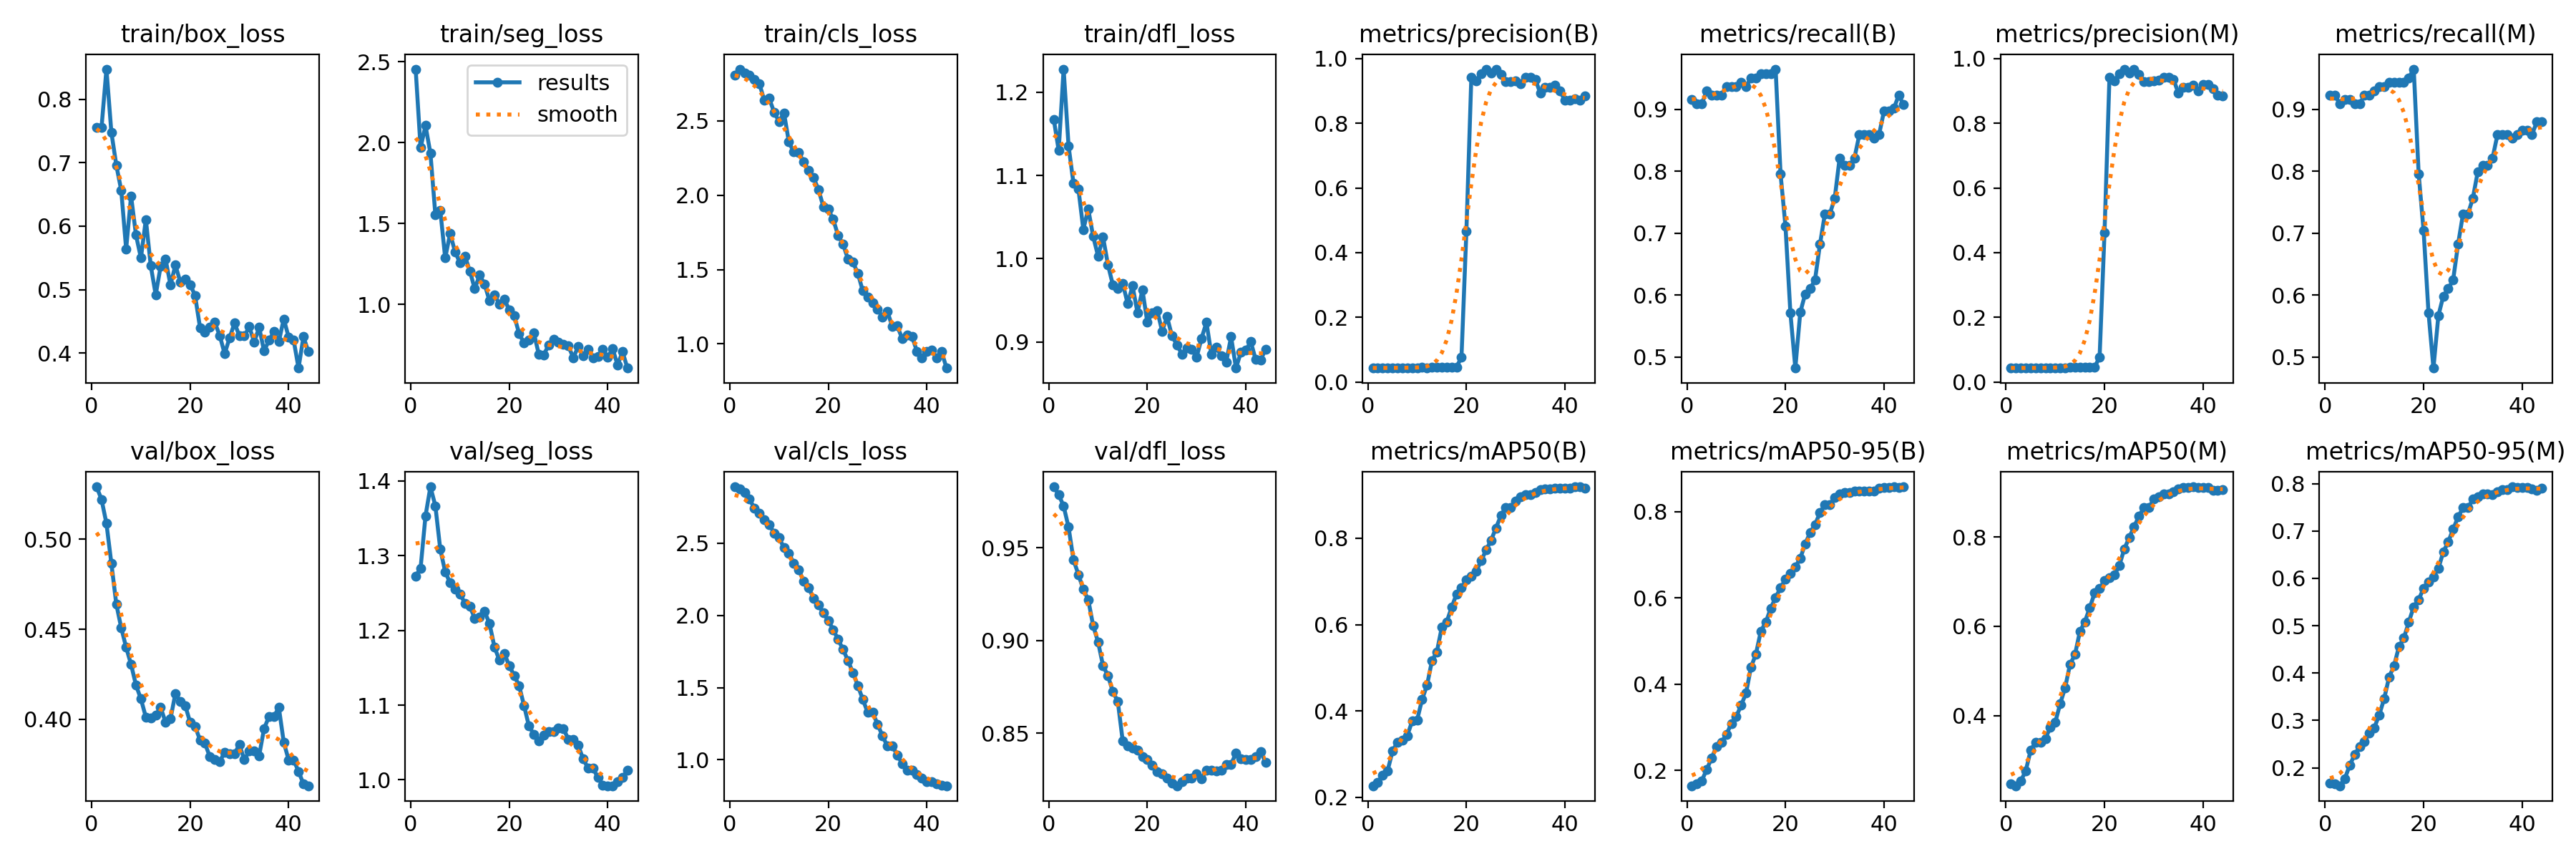

In [21]:
import cv2 
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
results_image=cv2.imread('C:\\Users\\Toheed\\Downloads\\runs\segment\\train46\\results.png')
results_image=cv2.cvtColor(results_image,cv2.COLOR_BGR2RGB)
display(Image.fromarray(results_image))


F1 Conf Curve

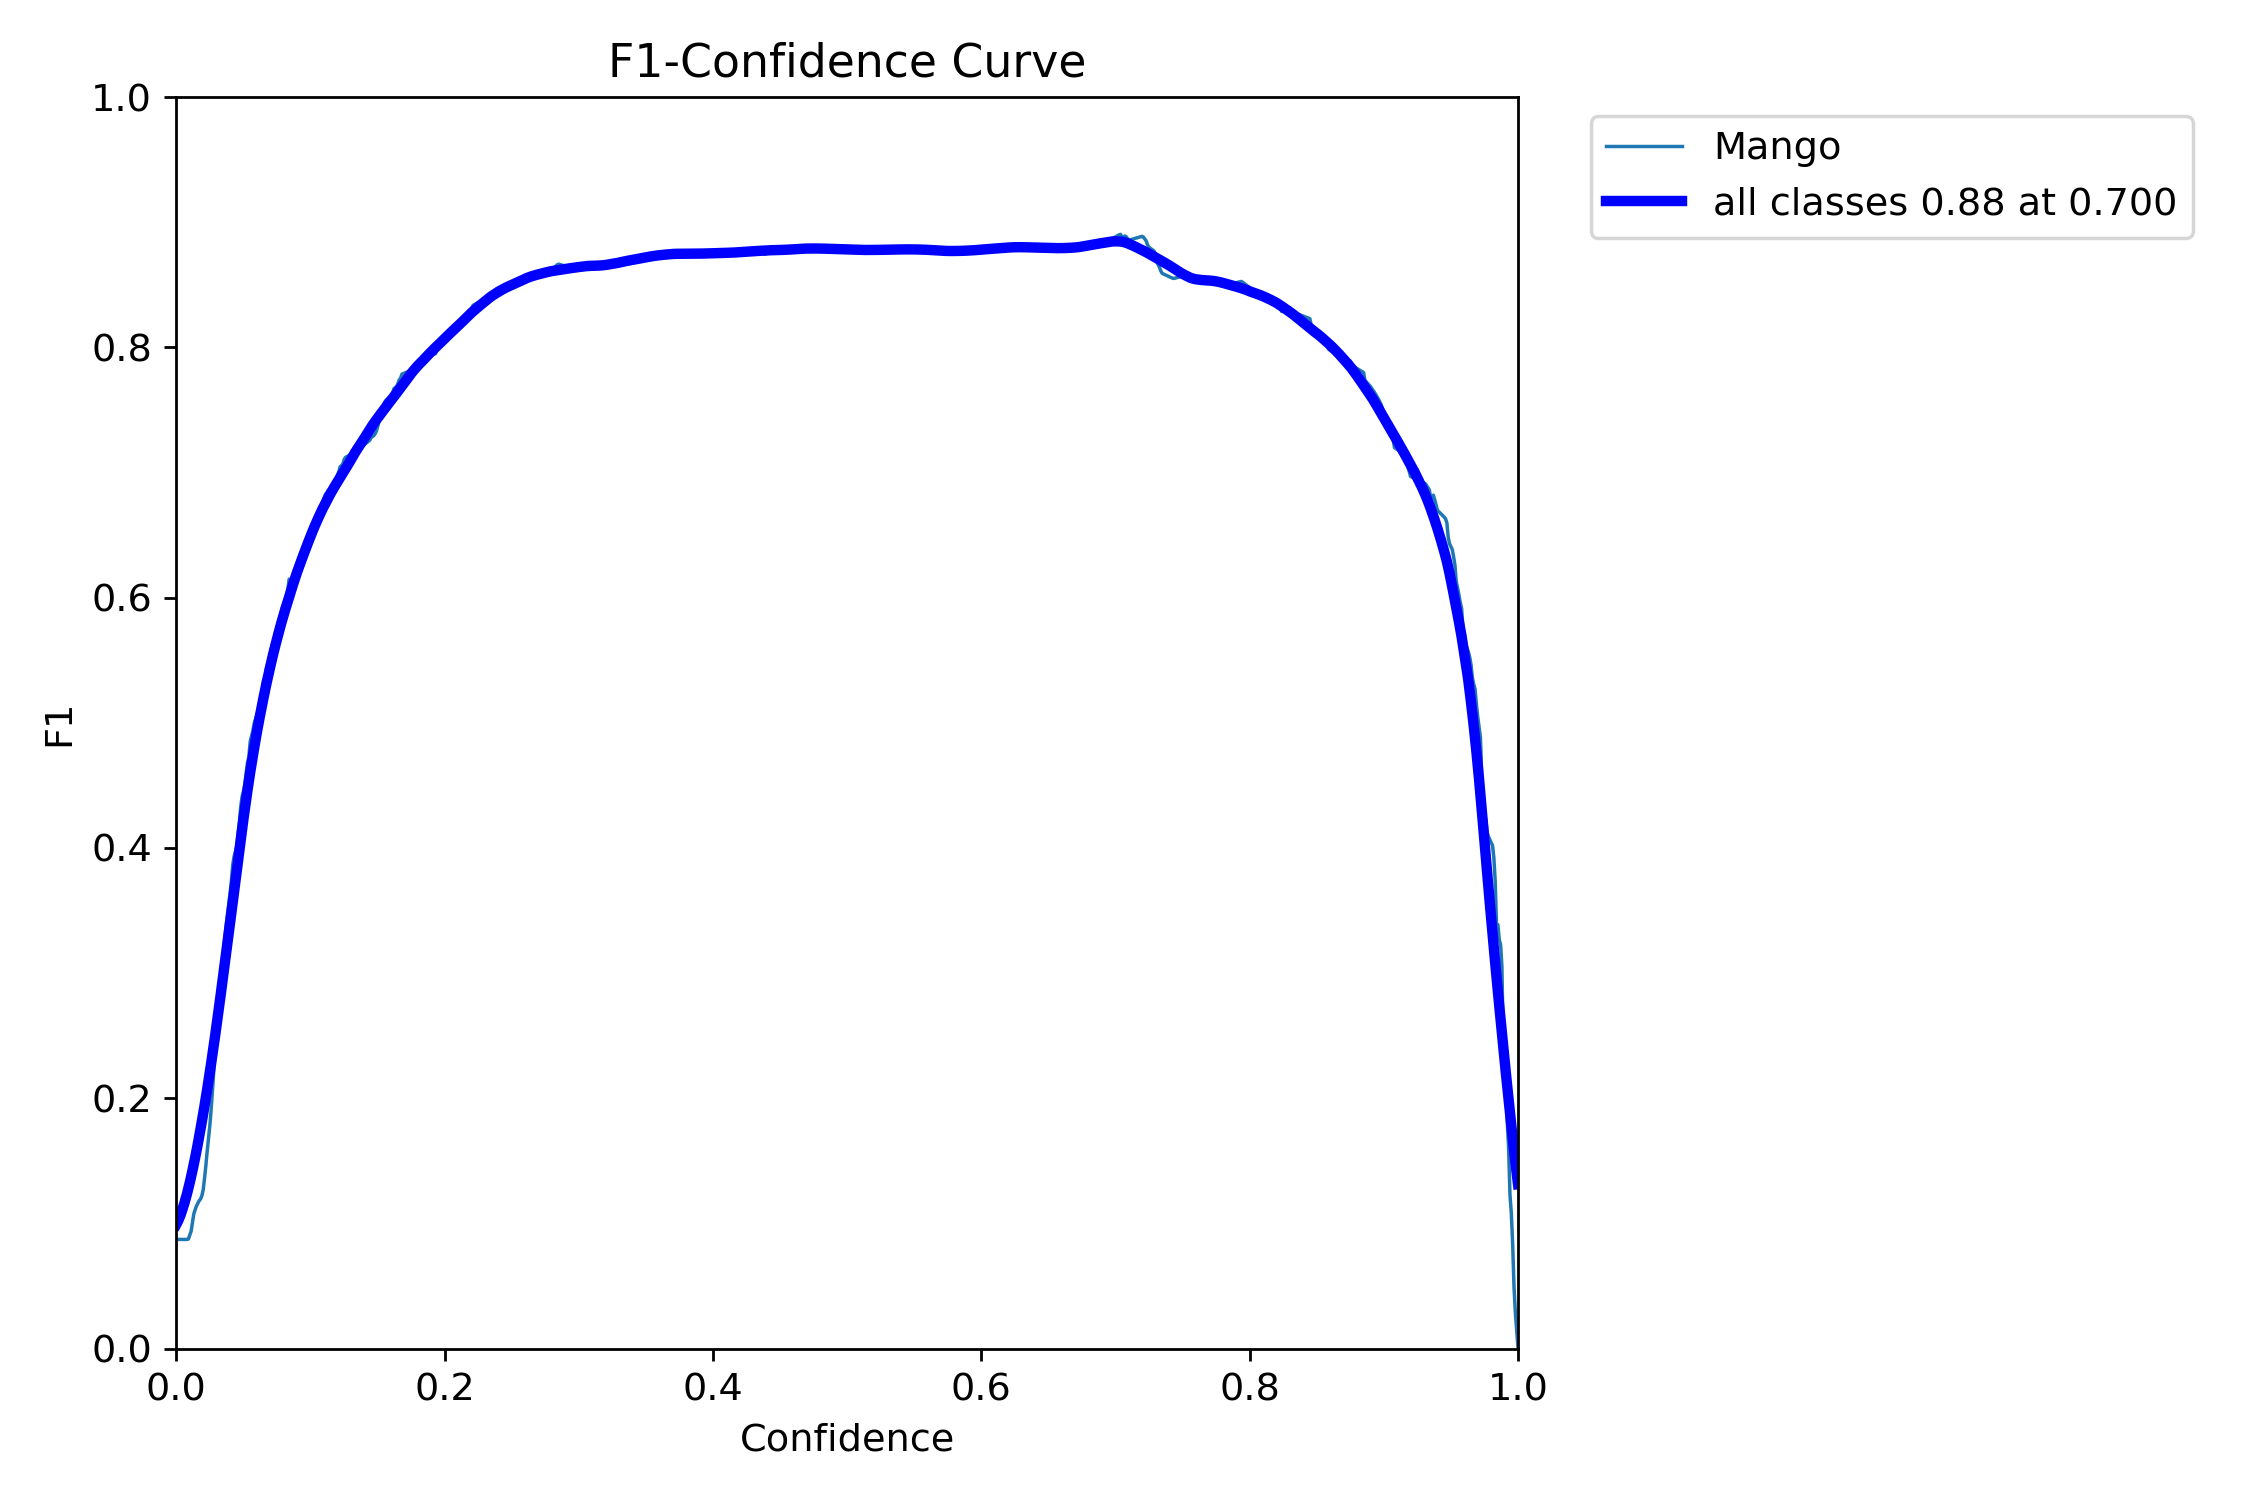

In [22]:
#Mask F1 curve
f1_curve = cv2.imread(r'C:\Users\Toheed\Downloads\runs\segment\train46\MaskF1_curve.png')
val_pred=cv2.cvtColor(f1_curve,cv2.COLOR_BGR2RGB)
display(Image.fromarray(val_pred))

-Predicted images

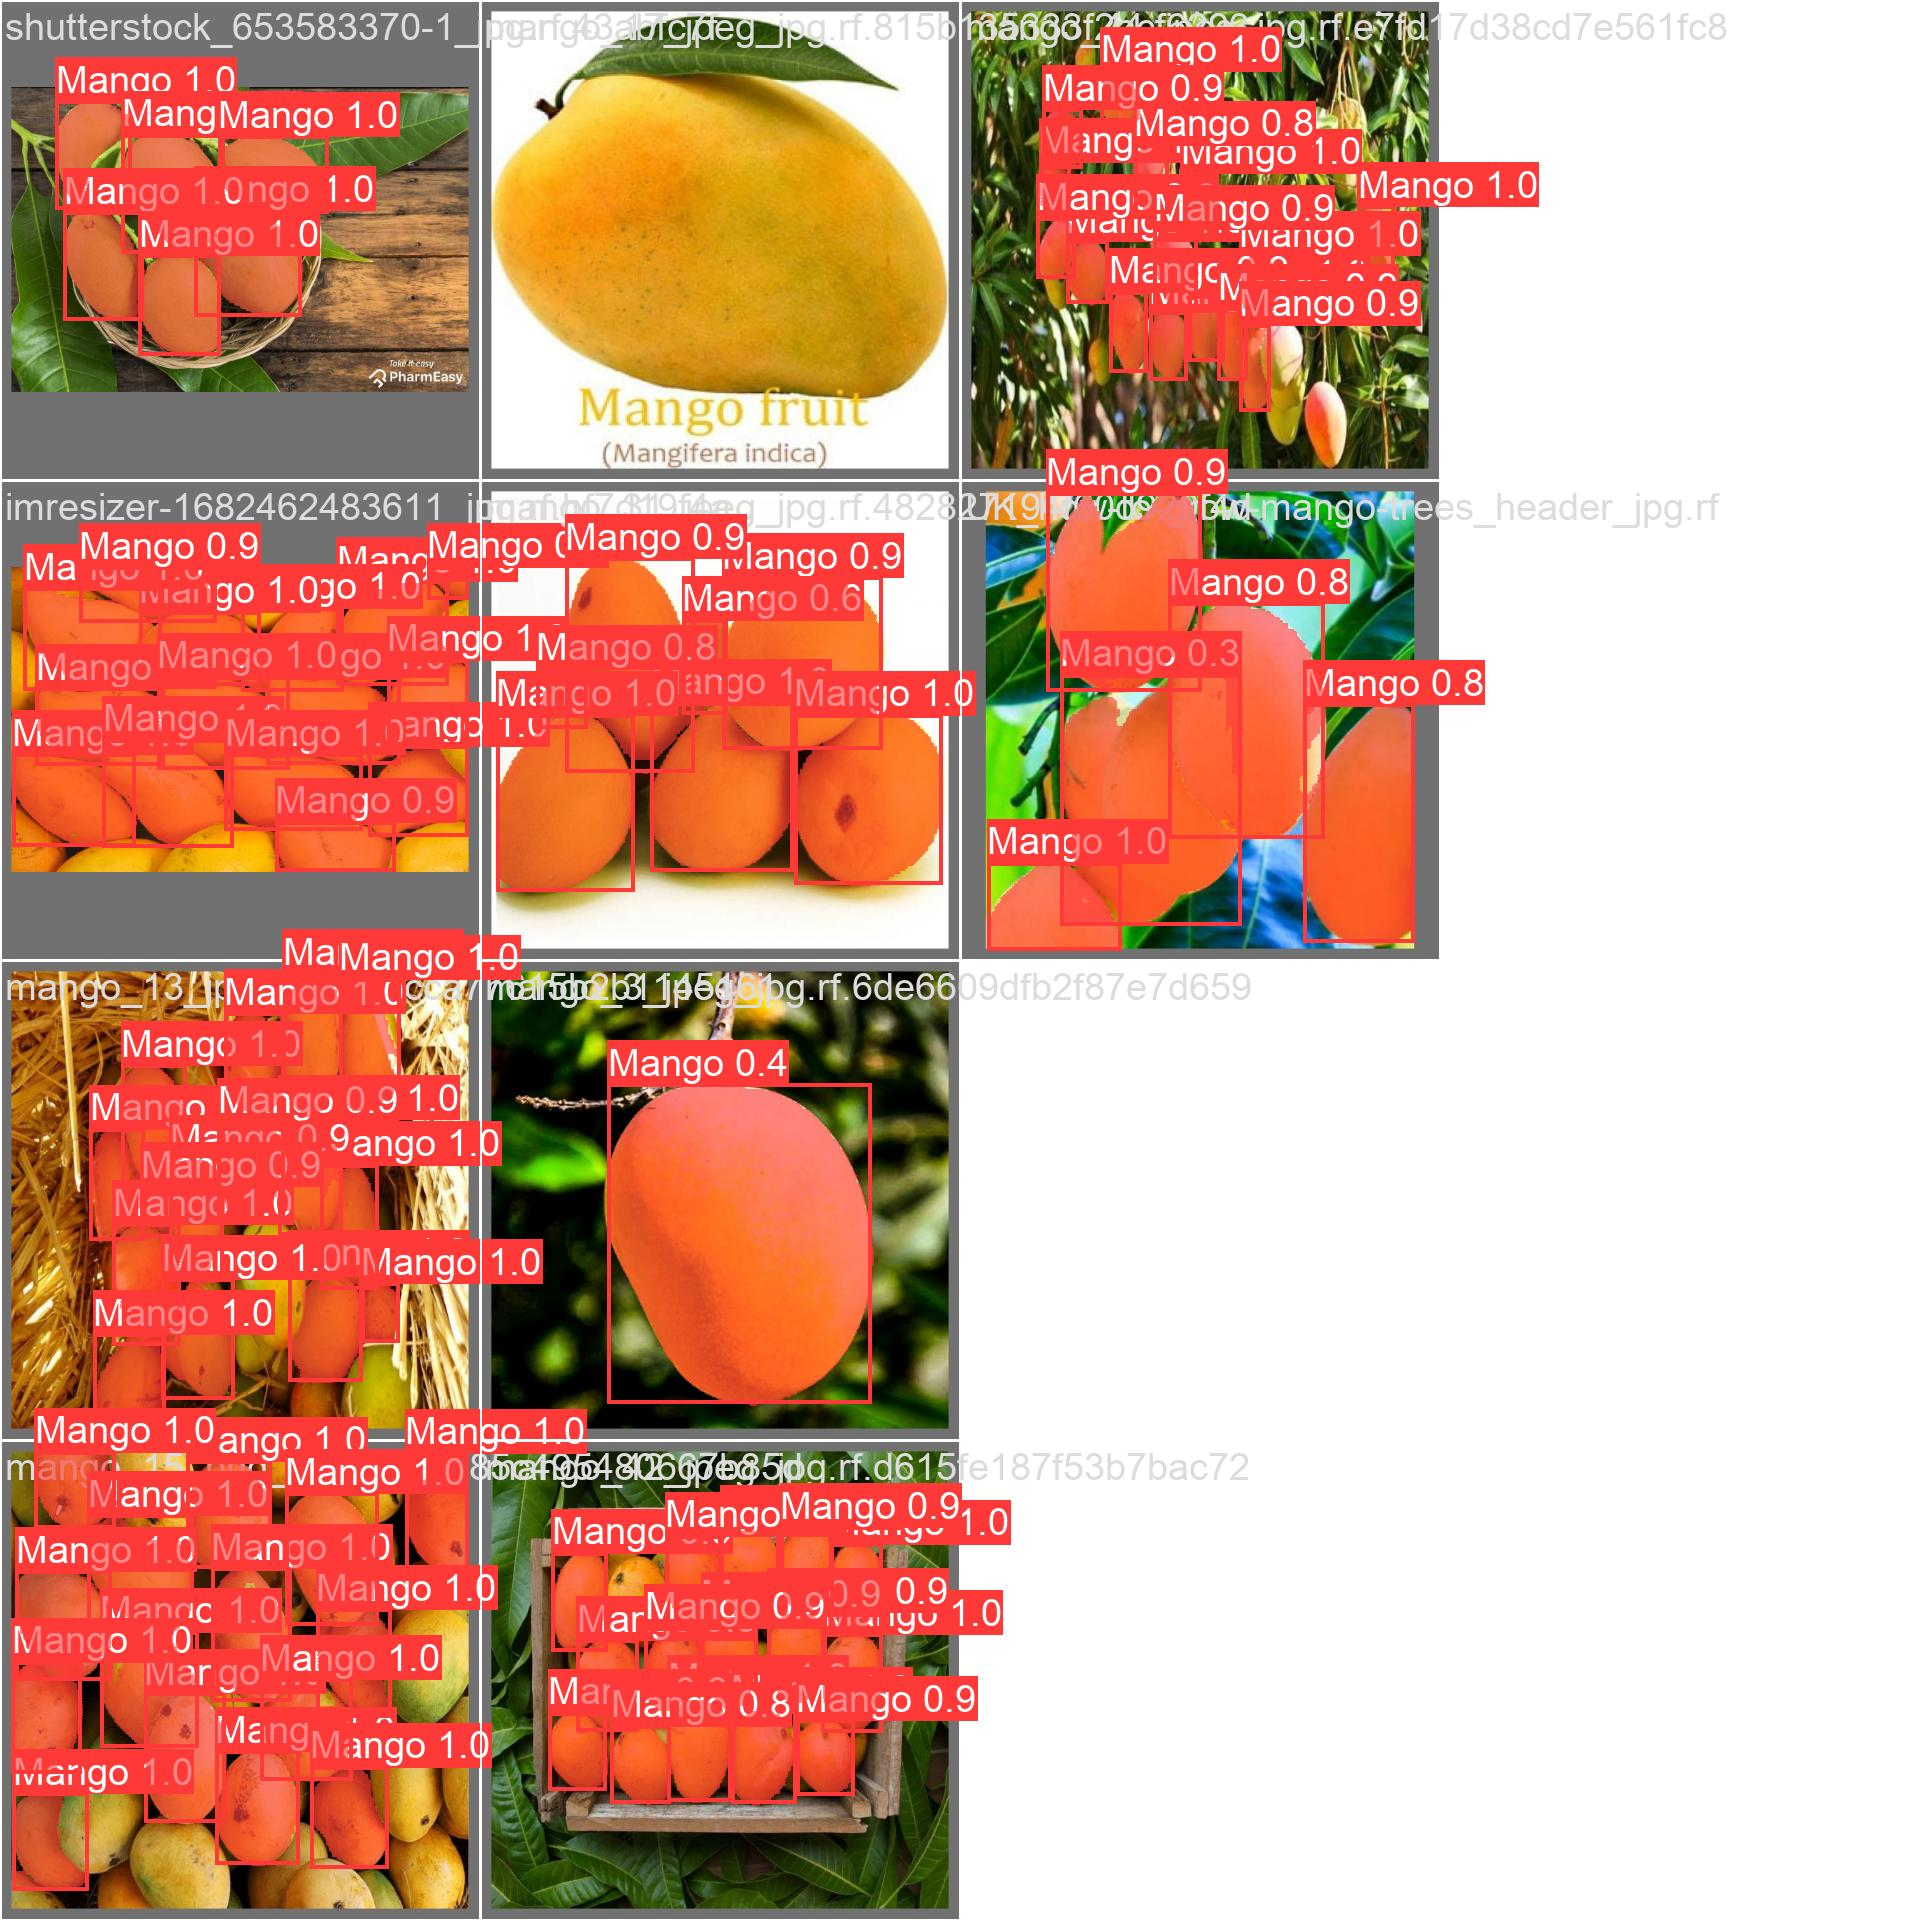

In [23]:
val_pred=cv2.imread(r'C:\Users\Toheed\Downloads\runs\segment\train46\val_batch0_pred.jpg')
val_pred=cv2.cvtColor(val_pred,cv2.COLOR_BGR2RGB)
display(Image.fromarray(val_pred))


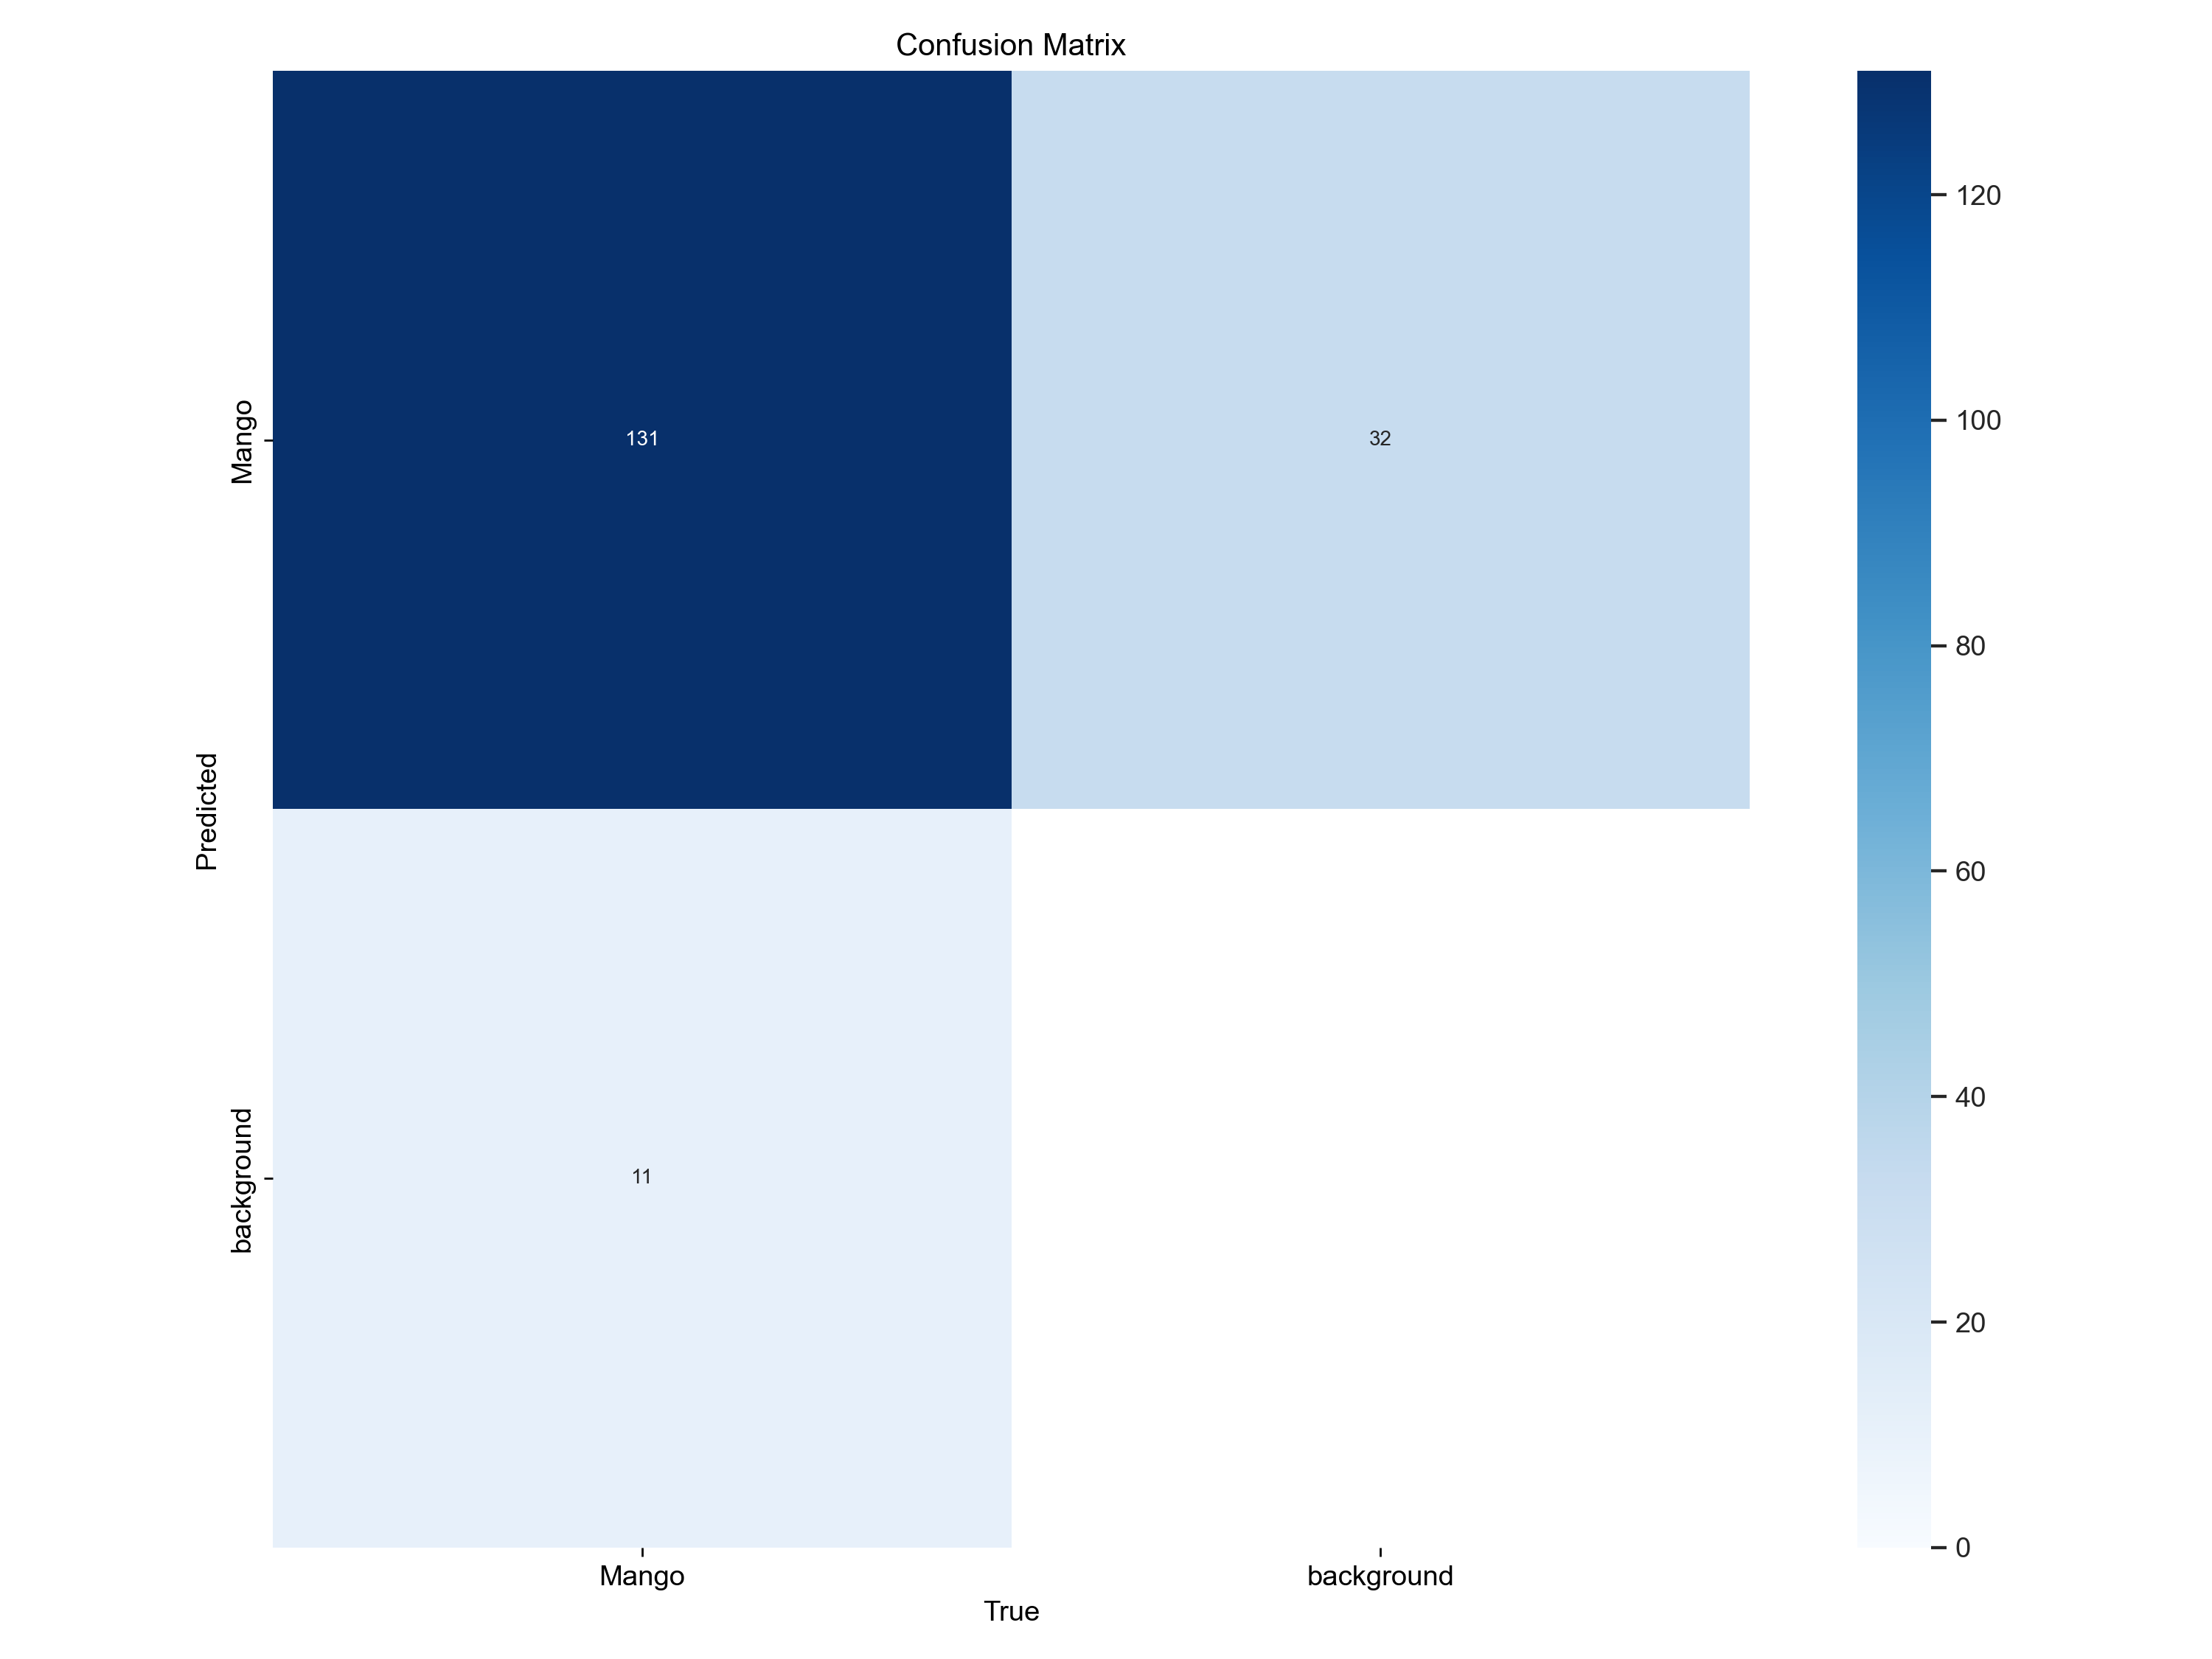

In [24]:
confusion_image=cv2.imread(r'C:\Users\Toheed\Downloads\runs\segment\train46\confusion_matrix.png')
confusion_image=cv2.cvtColor(confusion_image,cv2.COLOR_BGR2RGB)
display(Image.fromarray(confusion_image))

**Predicting on some random images from google

In [62]:
pred_image1=model.predict(r'C:\Users\Toheed\Pictures\Evaluate dataset\84247_genmango_978406.jpg', conf=0.25, save=True)
pred_image2=model.predict(r'C:\Users\Toheed\Pictures\Evaluate dataset\9091679-mango-verde-en-el-árbol.jpg', conf=0.25, save=True)




image 1/1 C:\Users\Toheed\Pictures\Evaluate dataset\84247_genmango_978406.jpg: 448x640 6 Mangos, 15.1ms
Speed: 3.4ms preprocess, 15.1ms inference, 6.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\segment\train468

image 1/1 C:\Users\Toheed\Pictures\Evaluate dataset\9091679-mango-verde-en-el-árbol.jpg: 640x448 2 Mangos, 12.0ms
Speed: 3.4ms preprocess, 12.0ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs\segment\train469


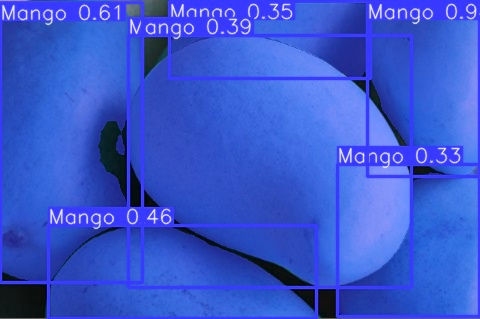

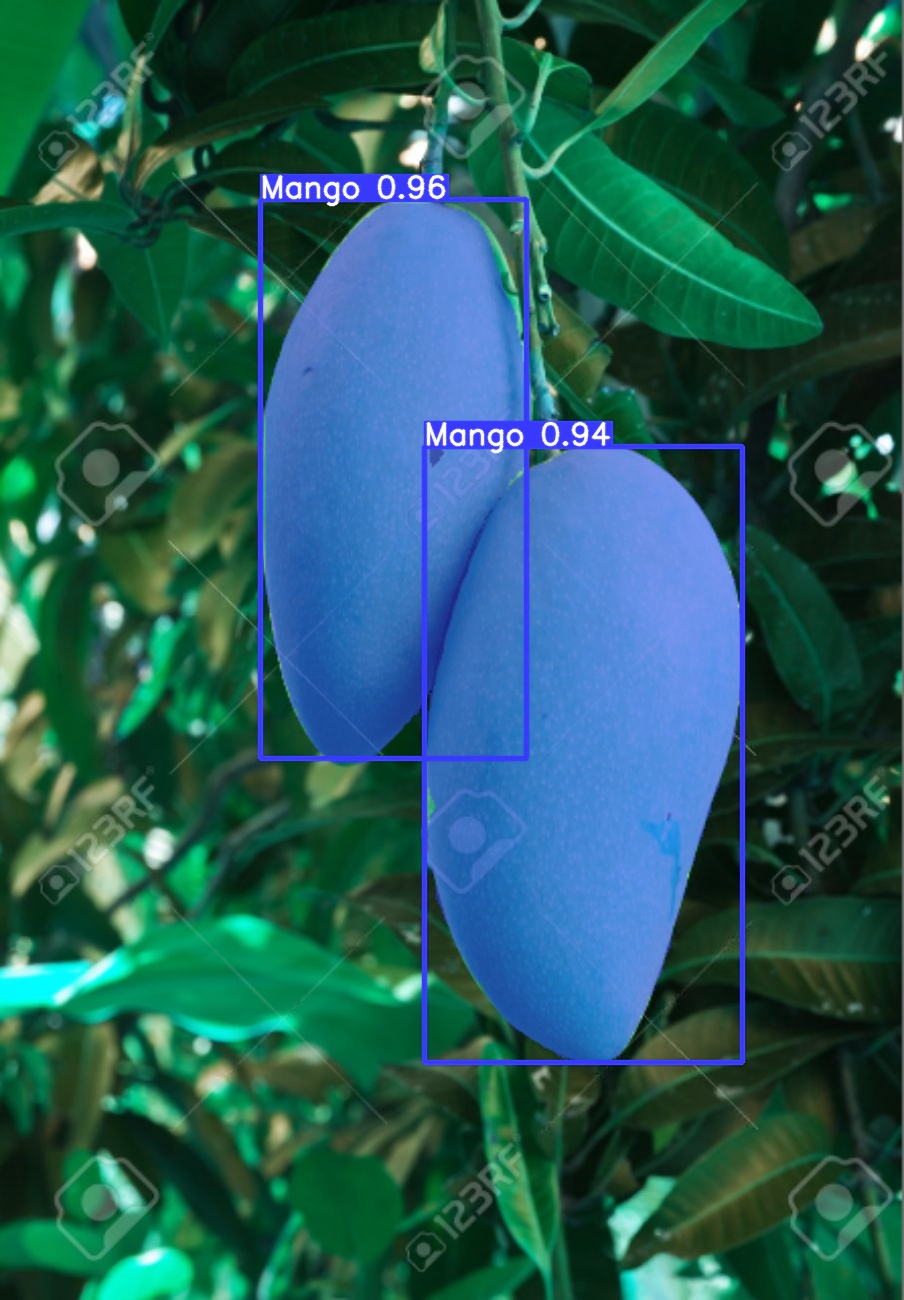

In [63]:
import cv2
from IPython.display import display

# Read the predicted images
pred_image1 = cv2.imread(r'C:\Users\Toheed\Downloads\runs\segment\train468\84247_genmango_978406.jpg')
display(Image.fromarray(pred_image1))
pred_image2 = cv2.imread(r'C:\Users\Toheed\Downloads\runs\segment\train469\9091679-mango-verde-en-el-árbol.jpg')
display(Image.fromarray(pred_image2))



-Summary

The model seems to be doing very good. I used roboflow for creating the datasets. Trained the pretrained yolov8 model with different paremeters and changed them around until a decent precision was acheived. Played with different learning rates,batch size, confidence, augmentation, hyperparameter tuning and used early stopping to avoid overfitting as much as possible. The model could be improved if we add more diverse dataset and apply more data augmentation techniques to fine tune it more with in depth hyperparameters i.e changing value of every single attribute etc.